# MA(q) Parameter Estimation

The moving average model of order $q$, denoted by $\text{MA}(q)$, is defined by,

$
\begin{align}
X_t = \sum_{i=1}^q \vartheta_i \varepsilon_{t-i} + \varepsilon_t
\end{align}
$

where $\varepsilon_t$ are independent and identically distributed random variables with distribution,

$
\begin{align}
\varepsilon_i \sim \text{Normal}(0, \sigma)
\end{align}
$

It follows that,

$
\begin{align}
&\text{E}[\varepsilon_t] = 0 \\
&\text{E}[\varepsilon_t^2] = \sigma^2 \\
&\text{E}[\varepsilon_t \varepsilon_s] = \delta_{ts} \sigma^2
\end{align}
$

Here the $\vartheta_i$ are estimated given an $MA(q)$ time series. 

## Includes

In [1]:
%reload_ext autoreload
%autoreload 2

# import system modules and set local import path
import os
import sys
from matplotlib import pyplot

sys.path.insert(0, os.path.abspath('../..'))

# import local modules
from lib import config
from lib import (DataType, SourceType, DataSource, perform_est, EstType)
from lib import (stack)

# Config Plot Style
pyplot.style.use(config.glyfish_style)

/Users/troy/.pyenv/versions/gly.fish.3.9.2/lib/python3.9/site-packages/pandas/compat/__init__.py:109: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


## Simulations ($\sigma = 1$)

In [2]:
nsample = 1000
σ = 1.0
θ_vals = [[0.2], [0.2, 0.4], [0.2, 0.1, 0.4]]
params = [{"θ": θ, "σ": σ, "npts": nsample} for θ in θ_vals]
title = "MA(q) Comparison Plot"
labels = [f"θ={val}" for val in θ_vals] 
ma = DataSource.create_parameter_scan(SourceType.MA, *params)

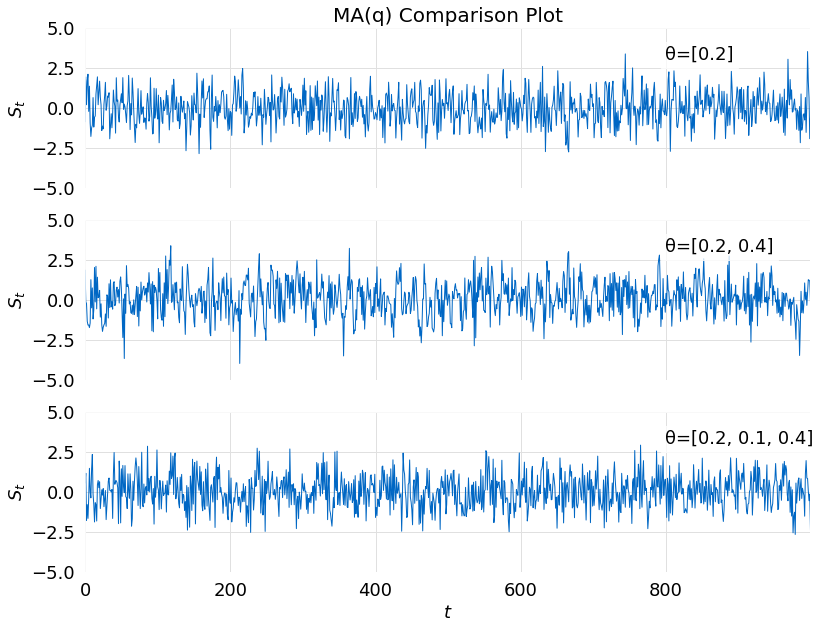

In [3]:
stack(ma, ylim=[-5.0, 5.0], title=title, labels=labels, data_type=DataType.TIME_SERIES)

## Estimation of $\text{MA}(q)$ Parameters

$\text{MA}(q)$ parameters are estimated using `statsmodels.tsa.arima_model.ARMA`

### $\text{MA}(1)$ Example ($\varphi = 0.2$)

In [4]:
results = perform_est(ma[0], EstType.MA, order=1)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   S(t)   No. Observations:                 1000
Model:                 ARIMA(0, 0, 1)   Log Likelihood               -1408.576
Date:                Tue, 24 May 2022   AIC                           2823.153
Time:                        09:51:32   BIC                           2837.876
Sample:                             0   HQIC                          2828.748
                               - 1000                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0072      0.037      0.194      0.846      -0.066       0.080
ma.L1          0.1891      0.033      5.788      0.000       0.125       0.253
sigma2         0.9794      0.044     22.231      0.000       0.893       1.066
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 0.10
Prob(Q):                              0.95   Prob(JB):                         0.95
Heteroskedasticity (H):               1.04   Skew:                             0.02
Prob(H) (two-sided):                  0.71   Kurtosis:                         2.98
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [5]:
ma[0].attrs

{'S(t)': {'npts': 1000,
  'DataType': <DataType.TIME_SERIES: 'TIME_SERIES'>,
  'Parameters': {'θ': [0.2], 'σ': 1.0},
  'Description': 'MA(1)',
  'ylabel': '$S_t$',
  'xlabel': '$t$',
  'SourceSchema': None,
  'Formula': None,
  'Estimates': {'MA(1)': {'Type': <EstType.MA: 'MA'>,
    'Const': {'Estimate': 0.007229456071101707,
     'Error': 0.03733846811469923,
     'Estimate Label': '$\\hat{\\mu^*}$',
     'Error Label': '$\\sigma_{\\hat{\\mu^*}}$'},
    'Parameters': [{'Estimate': 0.18914173603790715,
      'Error': 0.03267727276378084,
      'Estimate Label': '$\\hat{\\theta_{0}}$',
      'Error Label': '$\\sigma_{$\\hat{\theta_{0}}}$'}],
    'Sigma2': {'Estimate': 0.9794424215217594,
     'Error': 0.044058294063706434,
     'Estimate Label': '$\\hat{\\sigma^2}$',
     'Error Label': '$\\sigma_{\\hat{\\sigma^2}}$'}}},
  'Tests': {}},
 'Date': '24/05/2022 09:51:31',
 'Name': 'MA(1)-Simulation-684bf92e-97ec-43c0-9595-246241fcc874',
 'SourceSchema': DataSchema(xcol=(Time), ycol=(S(t)), 

### $\text{MA}(2)$ Example ($\varphi = [0.2, 0.4]$)

In [6]:
results = perform_est(ma[1], EstType.MA, order=2)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   S(t)   No. Observations:                 1000
Model:                 ARIMA(0, 0, 2)   Log Likelihood               -1404.044
Date:                Tue, 24 May 2022   AIC                           2816.088
Time:                        09:51:32   BIC                           2835.719
Sample:                             0   HQIC                          2823.549
                               - 1000                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1058      0.052      2.035      0.042       0.004       0.208
ma.L1          0.2247      0.028      8.115      0.000       0.170       0.279
ma.L2          0.4433      0.028     15.618      0.000       0.388       0.499
sigma2         0.9702      0.043     22.593      0.000       0.886       1.054
===================================================================================
Ljung-Box (L1) (Q):                   0.10   Jarque-Bera (JB):                 0.32
Prob(Q):                              0.75   Prob(JB):                         0.85
Heteroskedasticity (H):               0.78   Skew:                            -0.03
Prob(H) (two-sided):                  0.03   Kurtosis:                         3.06
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [7]:
ma[1].attrs

{'S(t)': {'npts': 1000,
  'DataType': <DataType.TIME_SERIES: 'TIME_SERIES'>,
  'Parameters': {'θ': [0.2, 0.4], 'σ': 1.0},
  'Description': 'MA(2)',
  'ylabel': '$S_t$',
  'xlabel': '$t$',
  'SourceSchema': None,
  'Formula': None,
  'Estimates': {'MA(2)': {'Type': <EstType.MA: 'MA'>,
    'Const': {'Estimate': 0.10584405320759493,
     'Error': 0.052000440417218,
     'Estimate Label': '$\\hat{\\mu^*}$',
     'Error Label': '$\\sigma_{\\hat{\\mu^*}}$'},
    'Parameters': [{'Estimate': 0.22472143881774964,
      'Error': 0.027693196965814314,
      'Estimate Label': '$\\hat{\\theta_{0}}$',
      'Error Label': '$\\sigma_{$\\hat{\theta_{0}}}$'},
     {'Estimate': 0.44325924512643977,
      'Error': 0.028381493734877847,
      'Estimate Label': '$\\hat{\\theta_{1}}$',
      'Error Label': '$\\sigma_{$\\hat{\theta_{1}}}$'}],
    'Sigma2': {'Estimate': 0.9701928706784694,
     'Error': 0.04294266395254025,
     'Estimate Label': '$\\hat{\\sigma^2}$',
     'Error Label': '$\\sigma_{\\hat{\\si

### $\text{MA}(3)$ Example ($\varphi = [0.2, 0.1, 0.4]$)

In [8]:
results = perform_est(ma[2], EstType.MA, order=3)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   S(t)   No. Observations:                 1000
Model:                 ARIMA(0, 0, 3)   Log Likelihood               -1407.311
Date:                Tue, 24 May 2022   AIC                           2824.622
Time:                        09:51:32   BIC                           2849.161
Sample:                             0   HQIC                          2833.948
                               - 1000                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0372      0.049      0.761      0.447      -0.059       0.133
ma.L1          0.1442      0.030      4.811      0.000       0.085       0.203
ma.L2          0.0569      0.031      1.831      0.067      -0.004       0.118
ma.L3          0.3582      0.031     11.488      0.000       0.297       0.419
sigma2         0.9766      0.048     20.357      0.000       0.883       1.071
===================================================================================
Ljung-Box (L1) (Q):                   1.13   Jarque-Bera (JB):                 4.27
Prob(Q):                              0.29   Prob(JB):                         0.12
Heteroskedasticity (H):               0.89   Skew:                             0.06
Prob(H) (two-sided):                  0.30   Kurtosis:                         2.71
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [9]:
ma[2].attrs

{'S(t)': {'npts': 1000,
  'DataType': <DataType.TIME_SERIES: 'TIME_SERIES'>,
  'Parameters': {'θ': [0.2, 0.1, 0.4], 'σ': 1.0},
  'Description': 'MA(3)',
  'ylabel': '$S_t$',
  'xlabel': '$t$',
  'SourceSchema': None,
  'Formula': None,
  'Estimates': {'MA(3)': {'Type': <EstType.MA: 'MA'>,
    'Const': {'Estimate': 0.03718562247644367,
     'Error': 0.04887558433044025,
     'Estimate Label': '$\\hat{\\mu^*}$',
     'Error Label': '$\\sigma_{\\hat{\\mu^*}}$'},
    'Parameters': [{'Estimate': 0.1442314138843786,
      'Error': 0.029979558613666666,
      'Estimate Label': '$\\hat{\\theta_{0}}$',
      'Error Label': '$\\sigma_{$\\hat{\theta_{0}}}$'},
     {'Estimate': 0.056856238673317225,
      'Error': 0.0310461201635815,
      'Estimate Label': '$\\hat{\\theta_{1}}$',
      'Error Label': '$\\sigma_{$\\hat{\theta_{1}}}$'},
     {'Estimate': 0.35815485100543576,
      'Error': 0.031176181648454968,
      'Estimate Label': '$\\hat{\\theta_{2}}$',
      'Error Label': '$\\sigma_{$\\hat{\

## Simulations ($\sigma = 5$)

In [10]:
nsample = 1000
σ = 5.0
θ_vals = [[0.2], [0.2, 0.4], [0.2, 0.1, 0.4]]
params = [{"θ": θ, "σ": σ, "npts": nsample} for θ in θ_vals]
title = "MA(q) Comparison Plot"
labels = [f"θ={val}" for val in θ_vals] 
ma = DataSource.create_parameter_scan(SourceType.MA, *params)

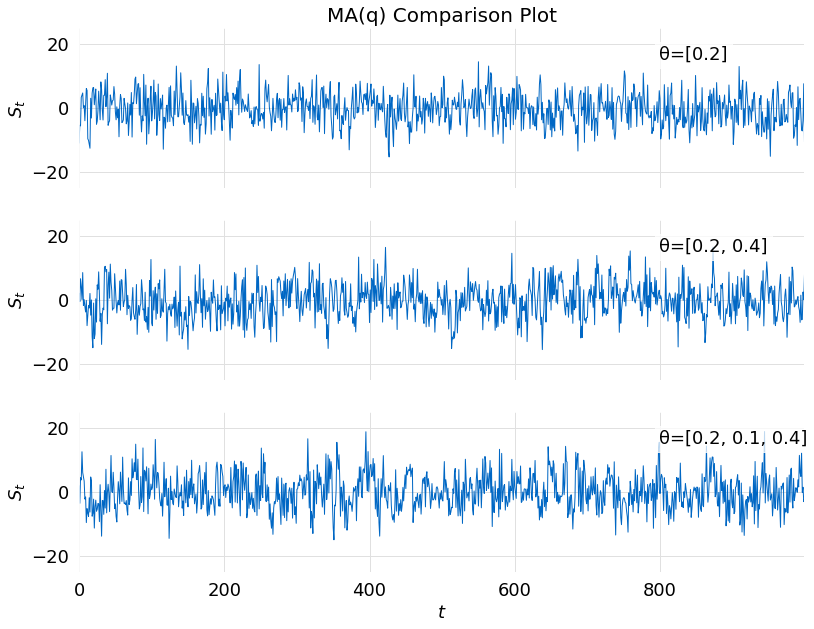

In [11]:
stack(ma, ylim=[-25.0, 25.0], title=title, labels=labels, data_type=DataType.TIME_SERIES)

## Estimation of $\text{MA}(q)$ Parameters

$\text{MA}(q)$ parameters are estimated using `statsmodels.tsa.arima_model.ARMA`

### $\text{MA}(1)$ Example ($\varphi = 0.2$)

In [12]:
results = perform_est(ma[0], EstType.MA, order=1)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   S(t)   No. Observations:                 1000
Model:                 ARIMA(0, 0, 1)   Log Likelihood               -3003.653
Date:                Tue, 24 May 2022   AIC                           6013.306
Time:                        09:51:32   BIC                           6028.030
Sample:                             0   HQIC                          6018.902
                               - 1000                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1846      0.184     -1.006      0.315      -0.544       0.175
ma.L1          0.1899      0.030      6.313      0.000       0.131       0.249
sigma2        23.7934      1.128     21.089      0.000      21.582      26.005
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 2.16
Prob(Q):                              0.92   Prob(JB):                         0.34
Heteroskedasticity (H):               1.00   Skew:                            -0.03
Prob(H) (two-sided):                  0.99   Kurtosis:                         2.78
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [13]:
ma[0].attrs

{'S(t)': {'npts': 1000,
  'DataType': <DataType.TIME_SERIES: 'TIME_SERIES'>,
  'Parameters': {'θ': [0.2], 'σ': 5.0},
  'Description': 'MA(1)',
  'ylabel': '$S_t$',
  'xlabel': '$t$',
  'SourceSchema': None,
  'Formula': None,
  'Estimates': {'MA(1)': {'Type': <EstType.MA: 'MA'>,
    'Const': {'Estimate': -0.18455737692212262,
     'Error': 0.1835114141668049,
     'Estimate Label': '$\\hat{\\mu^*}$',
     'Error Label': '$\\sigma_{\\hat{\\mu^*}}$'},
    'Parameters': [{'Estimate': 0.18992431754044764,
      'Error': 0.03008324709384387,
      'Estimate Label': '$\\hat{\\theta_{0}}$',
      'Error Label': '$\\sigma_{$\\hat{\theta_{0}}}$'}],
    'Sigma2': {'Estimate': 23.793382661650607,
     'Error': 1.1282108950423835,
     'Estimate Label': '$\\hat{\\sigma^2}$',
     'Error Label': '$\\sigma_{\\hat{\\sigma^2}}$'}}},
  'Tests': {}},
 'Date': '24/05/2022 09:51:32',
 'Name': 'MA(1)-Simulation-6cec5515-dc9f-40bd-b7e2-7291a065d738',
 'SourceSchema': DataSchema(xcol=(Time), ycol=(S(t)), dat

### $\text{MA}(2)$ Example ($\varphi = [0.2, 0.4]$)

In [14]:
results = perform_est(ma[1], EstType.MA, order=2)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   S(t)   No. Observations:                 1000
Model:                 ARIMA(0, 0, 2)   Log Likelihood               -3028.273
Date:                Tue, 24 May 2022   AIC                           6064.547
Time:                        09:51:32   BIC                           6084.178
Sample:                             0   HQIC                          6072.008
                               - 1000                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2464      0.252     -0.978      0.328      -0.740       0.248
ma.L1          0.2006      0.029      6.973      0.000       0.144       0.257
ma.L2          0.3858      0.028     13.556      0.000       0.330       0.442
sigma2        24.9858      1.194     20.918      0.000      22.645      27.327
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):                 2.49
Prob(Q):                              0.82   Prob(JB):                         0.29
Heteroskedasticity (H):               0.79   Skew:                             0.01
Prob(H) (two-sided):                  0.03   Kurtosis:                         2.76
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [15]:
ma[1].attrs

{'S(t)': {'npts': 1000,
  'DataType': <DataType.TIME_SERIES: 'TIME_SERIES'>,
  'Parameters': {'θ': [0.2, 0.4], 'σ': 5.0},
  'Description': 'MA(2)',
  'ylabel': '$S_t$',
  'xlabel': '$t$',
  'SourceSchema': None,
  'Formula': None,
  'Estimates': {'MA(2)': {'Type': <EstType.MA: 'MA'>,
    'Const': {'Estimate': -0.2463518800943749,
     'Error': 0.25199148887712025,
     'Estimate Label': '$\\hat{\\mu^*}$',
     'Error Label': '$\\sigma_{\\hat{\\mu^*}}$'},
    'Parameters': [{'Estimate': 0.2006265049352256,
      'Error': 0.02877056957931638,
      'Estimate Label': '$\\hat{\\theta_{0}}$',
      'Error Label': '$\\sigma_{$\\hat{\theta_{0}}}$'},
     {'Estimate': 0.38581155451698546,
      'Error': 0.028460907229876466,
      'Estimate Label': '$\\hat{\\theta_{1}}$',
      'Error Label': '$\\sigma_{$\\hat{\theta_{1}}}$'}],
    'Sigma2': {'Estimate': 24.98576674540309,
     'Error': 1.194480881470031,
     'Estimate Label': '$\\hat{\\sigma^2}$',
     'Error Label': '$\\sigma_{\\hat{\\sigma

### $\text{MA}(3)$ Example ($\varphi = [0.2, 0.1, 0.4]$)

In [16]:
results = perform_est(ma[2], EstType.MA, order=3)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   S(t)   No. Observations:                 1000
Model:                 ARIMA(0, 0, 3)   Log Likelihood               -3031.544
Date:                Tue, 24 May 2022   AIC                           6073.089
Time:                        09:51:32   BIC                           6097.628
Sample:                             0   HQIC                          6082.415
                               - 1000                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0247      0.284      0.087      0.931      -0.531       0.581
ma.L1          0.2253      0.029      7.849      0.000       0.169       0.282
ma.L2          0.1336      0.030      4.409      0.000       0.074       0.193
ma.L3          0.4098      0.029     13.895      0.000       0.352       0.468
sigma2        25.1436      1.096     22.947      0.000      22.996      27.291
===================================================================================
Ljung-Box (L1) (Q):                   0.23   Jarque-Bera (JB):                 5.03
Prob(Q):                              0.63   Prob(JB):                         0.08
Heteroskedasticity (H):               0.99   Skew:                             0.16
Prob(H) (two-sided):                  0.95   Kurtosis:                         3.14
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [17]:
ma[2].attrs

{'S(t)': {'npts': 1000,
  'DataType': <DataType.TIME_SERIES: 'TIME_SERIES'>,
  'Parameters': {'θ': [0.2, 0.1, 0.4], 'σ': 5.0},
  'Description': 'MA(3)',
  'ylabel': '$S_t$',
  'xlabel': '$t$',
  'SourceSchema': None,
  'Formula': None,
  'Estimates': {'MA(3)': {'Type': <EstType.MA: 'MA'>,
    'Const': {'Estimate': 0.024721632507124666,
     'Error': 0.2837437216425398,
     'Estimate Label': '$\\hat{\\mu^*}$',
     'Error Label': '$\\sigma_{\\hat{\\mu^*}}$'},
    'Parameters': [{'Estimate': 0.22526782101683457,
      'Error': 0.028700638821602304,
      'Estimate Label': '$\\hat{\\theta_{0}}$',
      'Error Label': '$\\sigma_{$\\hat{\theta_{0}}}$'},
     {'Estimate': 0.13355811260613976,
      'Error': 0.030289086444192766,
      'Estimate Label': '$\\hat{\\theta_{1}}$',
      'Error Label': '$\\sigma_{$\\hat{\theta_{1}}}$'},
     {'Estimate': 0.4098458064351171,
      'Error': 0.029494978532107214,
      'Estimate Label': '$\\hat{\\theta_{2}}$',
      'Error Label': '$\\sigma_{$\\hat{